In [66]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [67]:
# Load Data
df = pd.read_csv("../data/cleaned_data.csv")
X = df.drop(columns=["target"])
y = df["target"]

In [68]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Hyperparameter Tuning
param_grid = {
    "max_depth": [3, 5, 10, 11, None],
    "min_samples_split": [2, 5, 10]
}

In [70]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
best_model = clf.best_estimator_

In [71]:
# Evaluate Model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [72]:
print("Best Parameters:", clf.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 11, 'min_samples_split': 2}
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



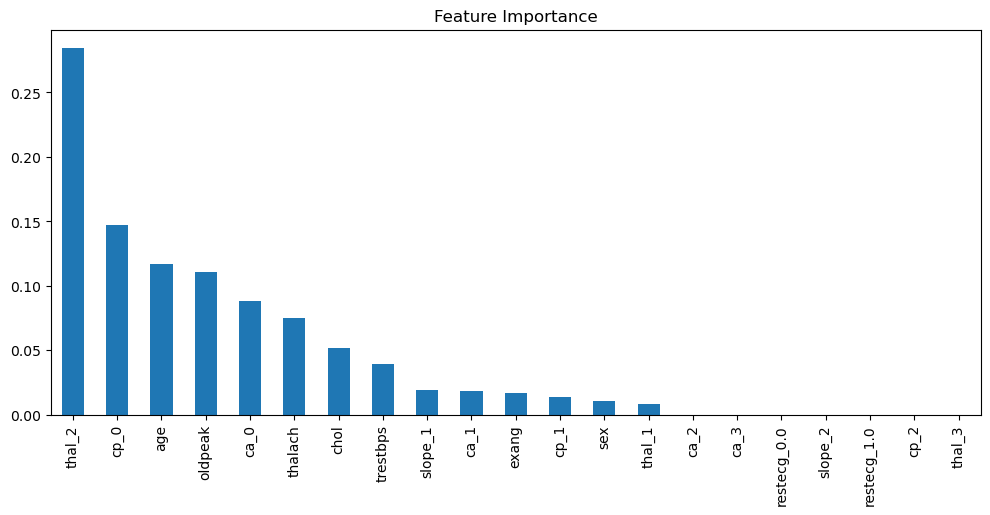

In [73]:
# Feature Importance Plot
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 5))
feature_importances.sort_values(ascending=False).plot(kind="bar", title="Feature Importance")
plt.show()

In [74]:
# Save Model
joblib.dump(best_model, "../ml_model/decision_tree_model.pkl")
print("Model saved successfully!")

Model saved successfully!
